In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#EDA

In [13]:
train_df = pd.read_csv("house_price_train.csv")
test_df = pd.read_csv("house_price_test.csv")

df = train_df 
df.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.000,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.000,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.000,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.000,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [21]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
 
check_df(df)

##################### Shape #####################
(1460, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
##################### Head #####################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    In

In [19]:
#CAPTURING NUMERICAL AND CATEGORICAL VARIABLES

In [34]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, cat_but_car, num_cols

In [42]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 1460
Variables: 81
cat_cols: 53
num_cols: 27
cat_but_car: 1
num_but_cat: 11


In [38]:
#Analysis of Categorical Variables

In [44]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)

          MSZoning  Ratio
MSZoning                 
RL            1151 78.836
RM             218 14.932
FV              65  4.452
RH              16  1.096
C (all)         10  0.685
        Street  Ratio
Street               
Pave      1454 99.589
Grvl         6  0.411
       Alley  Ratio
Alley              
Grvl      50  3.425
Pave      41  2.808
          LotShape  Ratio
LotShape                 
Reg            925 63.356
IR1            484 33.151
IR2             41  2.808
IR3             10  0.685
             LandContour  Ratio
LandContour                    
Lvl                 1311 89.795
Bnk                   63  4.315
HLS                   50  3.425
Low                   36  2.466
           Utilities  Ratio
Utilities                  
AllPub          1459 99.932
NoSeWa             1  0.068
           LotConfig  Ratio
LotConfig                  
Inside          1052 72.055
Corner           263 18.014
CulDSac           94  6.438
FR2               47  3.219
FR3                4  

In [46]:
#Analysis of Numerical Variables

count   1460.000
mean     730.500
std      421.610
min        1.000
5%        73.950
10%      146.900
20%      292.800
30%      438.700
40%      584.600
50%      730.500
60%      876.400
70%     1022.300
80%     1168.200
90%     1314.100
95%     1387.050
99%     1445.410
max     1460.000
Name: Id, dtype: float64


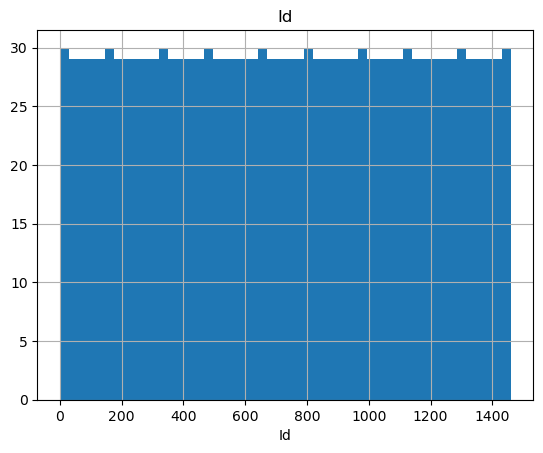

#####################################
count   1460.000
mean      56.897
std       42.301
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


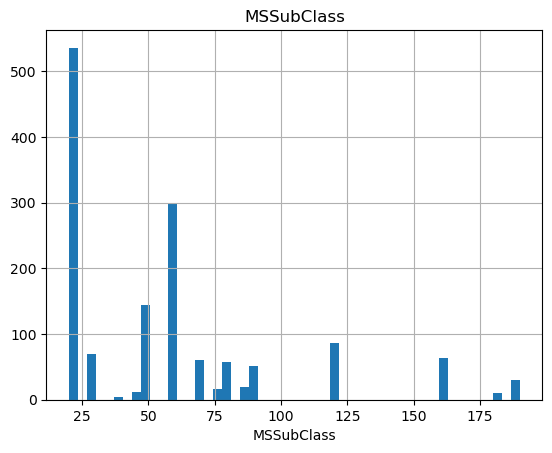

#####################################
count   1201.000
mean      70.050
std       24.285
min       21.000
5%        34.000
10%       44.000
20%       53.000
30%       60.000
40%       63.000
50%       69.000
60%       74.000
70%       79.000
80%       85.000
90%       96.000
95%      107.000
99%      141.000
max      313.000
Name: LotFrontage, dtype: float64


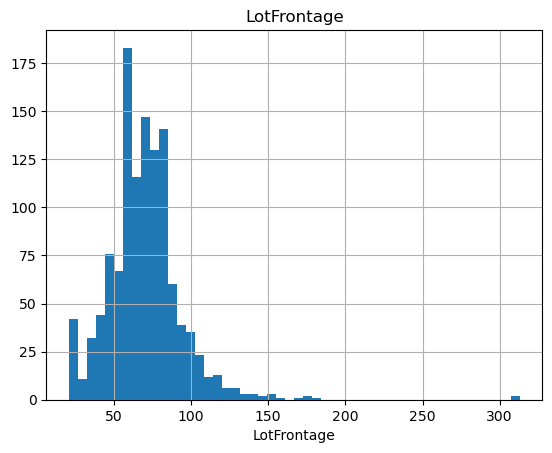

#####################################
count     1460.000
mean     10516.828
std       9981.265
min       1300.000
5%        3311.700
10%       5000.000
20%       7078.400
30%       8063.700
40%       8793.400
50%       9478.500
60%      10198.200
70%      11066.500
80%      12205.800
90%      14381.700
95%      17401.150
99%      37567.640
max     215245.000
Name: LotArea, dtype: float64


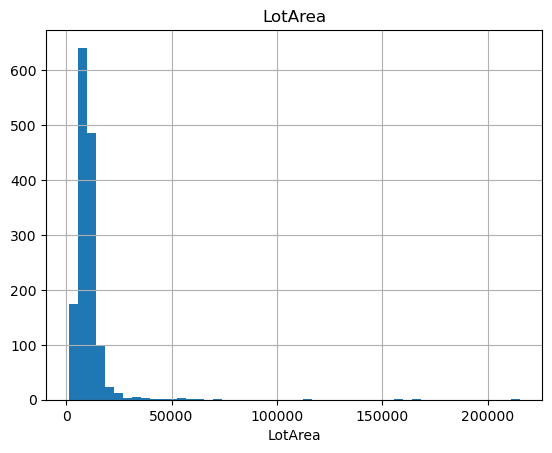

#####################################
count   1460.000
mean       6.099
std        1.383
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%       10.000
max       10.000
Name: OverallQual, dtype: float64


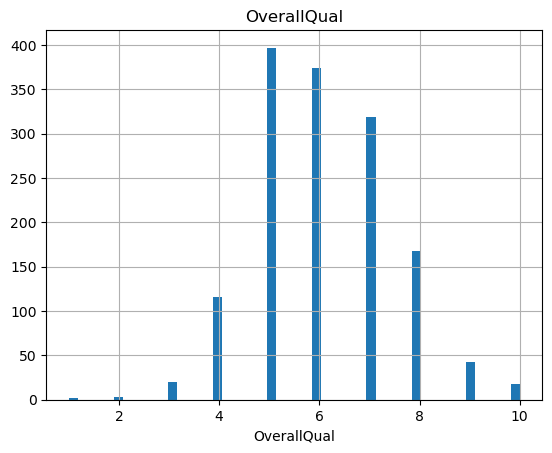

#####################################
count   1460.000
mean    1971.268
std       30.203
min     1872.000
5%      1916.000
10%     1924.900
20%     1947.800
30%     1958.000
40%     1965.000
50%     1973.000
60%     1984.000
70%     1997.300
80%     2003.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2010.000
Name: YearBuilt, dtype: float64


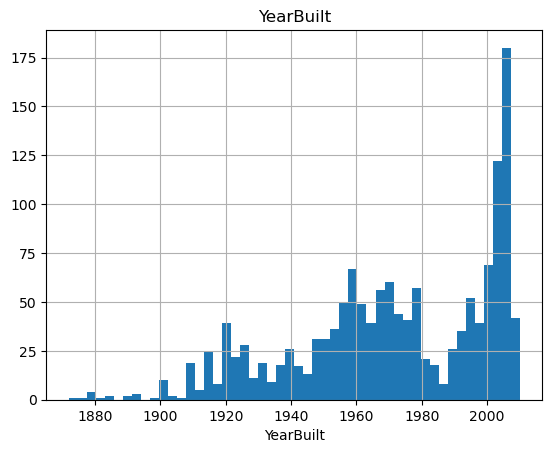

#####################################
count   1460.000
mean    1984.866
std       20.645
min     1950.000
5%      1950.000
10%     1950.000
20%     1961.800
30%     1971.000
40%     1980.000
50%     1994.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2010.000
Name: YearRemodAdd, dtype: float64


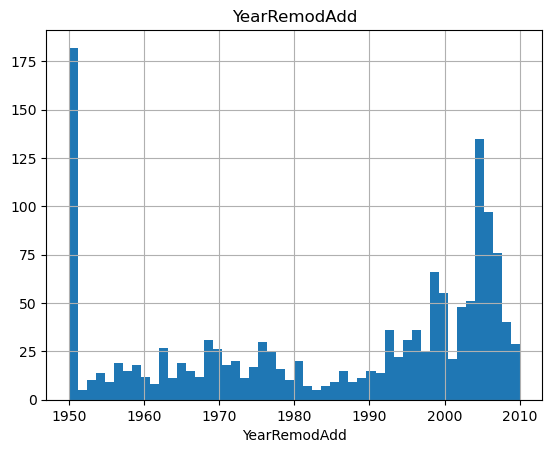

#####################################
count   1452.000
mean     103.685
std      181.066
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%       16.000
70%      117.000
80%      206.000
90%      335.000
95%      456.000
99%      791.920
max     1600.000
Name: MasVnrArea, dtype: float64


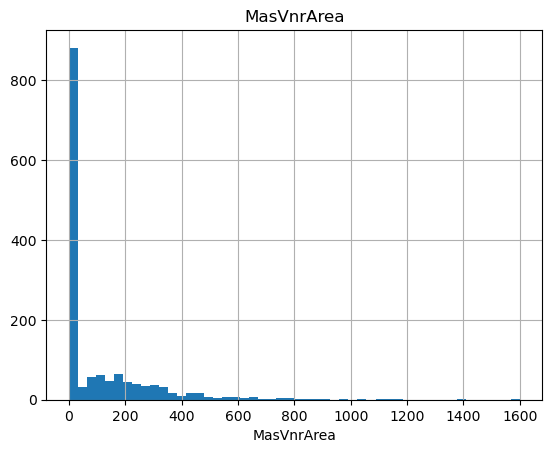

#####################################
count   1460.000
mean     443.640
std      456.098
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      218.600
50%      383.500
60%      525.600
70%      655.000
80%      806.400
90%     1065.500
95%     1274.000
99%     1572.410
max     5644.000
Name: BsmtFinSF1, dtype: float64


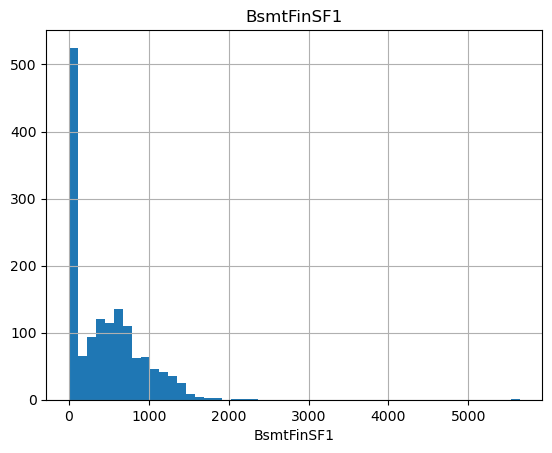

#####################################
count   1460.000
mean      46.549
std      161.319
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      117.200
95%      396.200
99%      830.380
max     1474.000
Name: BsmtFinSF2, dtype: float64


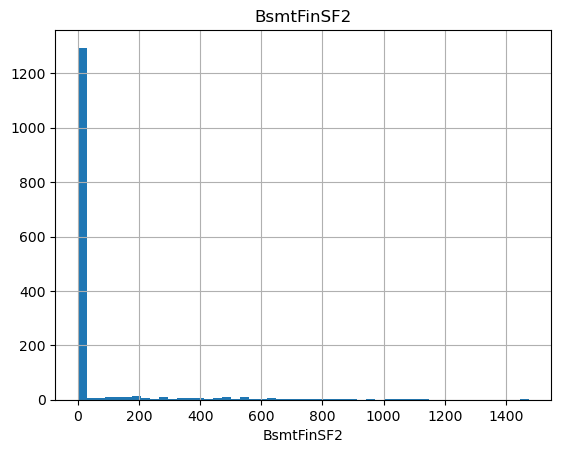

#####################################
count   1460.000
mean     567.240
std      441.867
min        0.000
5%         0.000
10%       74.900
20%      172.000
30%      280.000
40%      374.600
50%      477.500
60%      604.400
70%      736.000
80%      896.000
90%     1232.000
95%     1468.000
99%     1797.050
max     2336.000
Name: BsmtUnfSF, dtype: float64


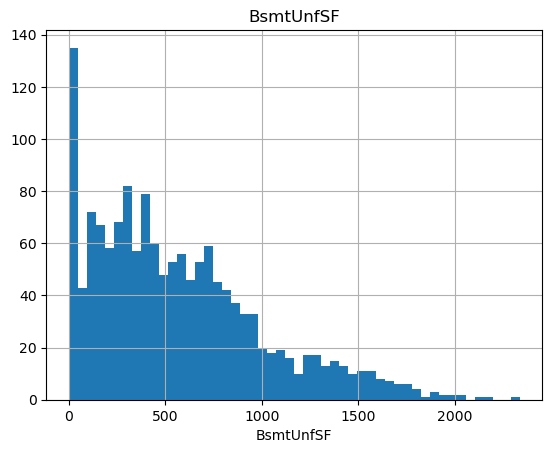

#####################################
count   1460.000
mean    1057.429
std      438.705
min        0.000
5%       519.300
10%      636.900
20%      755.800
30%      840.000
40%      910.000
50%      991.500
60%     1088.000
70%     1216.000
80%     1391.200
90%     1602.200
95%     1753.000
99%     2155.050
max     6110.000
Name: TotalBsmtSF, dtype: float64


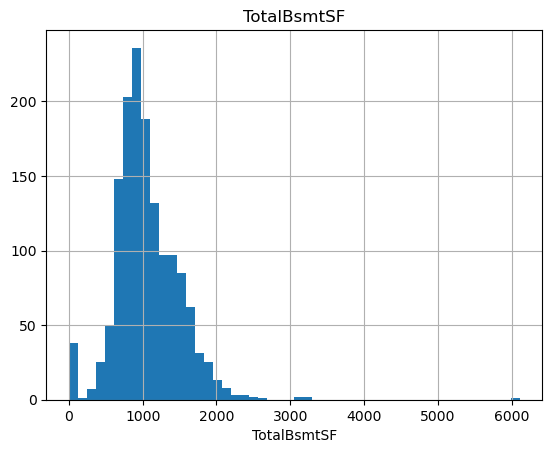

#####################################
count   1460.000
mean    1162.627
std      386.588
min      334.000
5%       672.950
10%      756.900
20%      848.000
30%      915.700
40%     1000.200
50%     1087.000
60%     1182.000
70%     1314.000
80%     1482.400
90%     1680.000
95%     1831.250
99%     2219.460
max     4692.000
Name: 1stFlrSF, dtype: float64


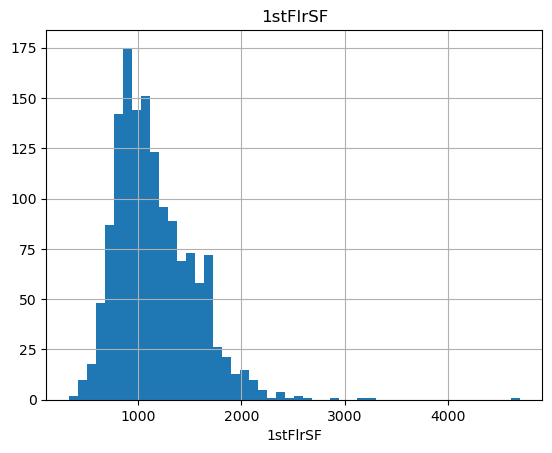

#####################################
count   1460.000
mean     346.992
std      436.528
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      455.400
70%      672.000
80%      796.200
90%      954.200
95%     1141.050
99%     1418.920
max     2065.000
Name: 2ndFlrSF, dtype: float64


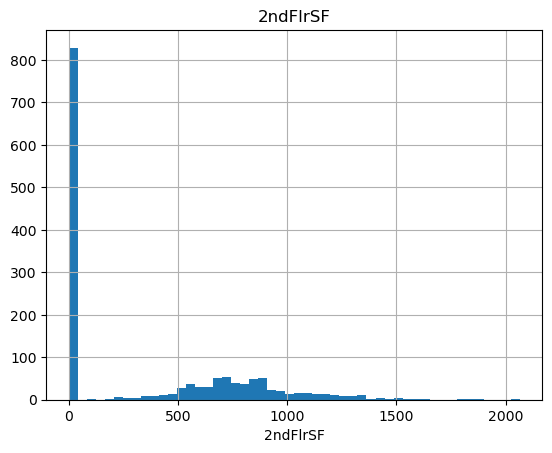

#####################################
count   1460.000
mean       5.845
std       48.623
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      360.000
max      572.000
Name: LowQualFinSF, dtype: float64


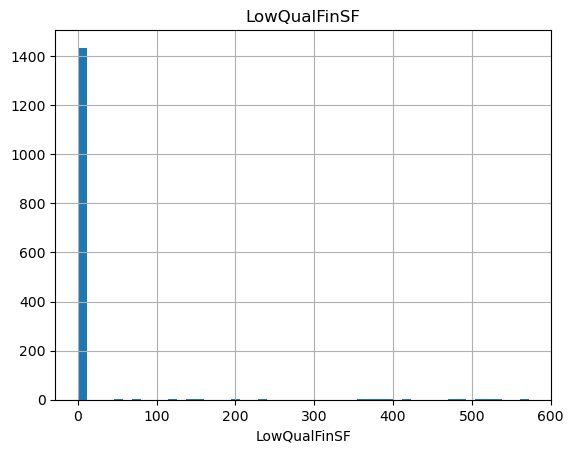

#####################################
count   1460.000
mean    1515.464
std      525.480
min      334.000
5%       848.000
10%      912.000
20%     1066.600
30%     1208.000
40%     1339.000
50%     1464.000
60%     1578.000
70%     1709.300
80%     1869.000
90%     2158.300
95%     2466.100
99%     3123.480
max     5642.000
Name: GrLivArea, dtype: float64


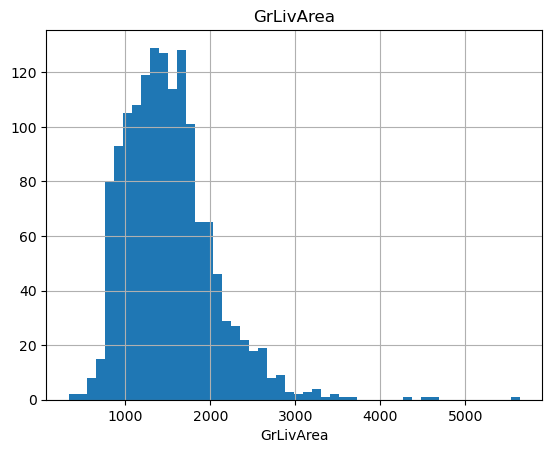

#####################################
count   1460.000
mean       6.518
std        1.625
min        2.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        9.000
95%       10.000
99%       11.000
max       14.000
Name: TotRmsAbvGrd, dtype: float64


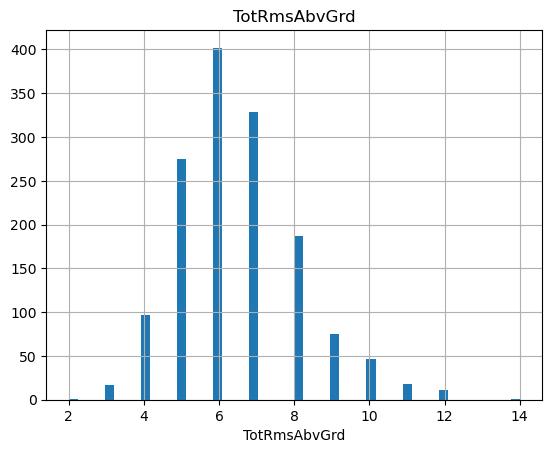

#####################################
count   1379.000
mean    1978.506
std       24.690
min     1900.000
5%      1930.000
10%     1945.000
20%     1957.000
30%     1965.000
40%     1973.000
50%     1980.000
60%     1993.000
70%     1999.000
80%     2004.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2010.000
Name: GarageYrBlt, dtype: float64


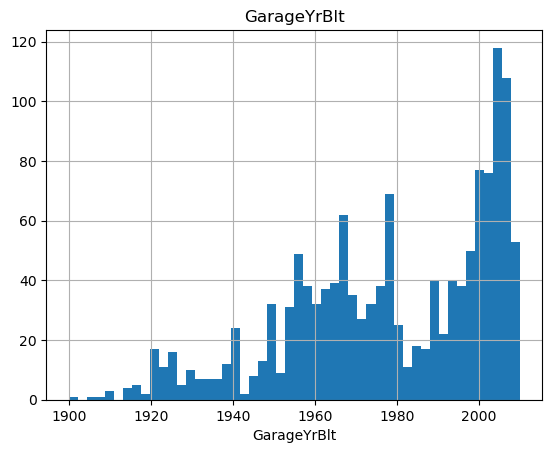

#####################################
count   1460.000
mean     472.980
std      213.805
min        0.000
5%         0.000
10%      240.000
20%      295.600
30%      384.000
40%      440.000
50%      480.000
60%      516.000
70%      560.000
80%      620.200
90%      757.100
95%      850.100
99%     1002.790
max     1418.000
Name: GarageArea, dtype: float64


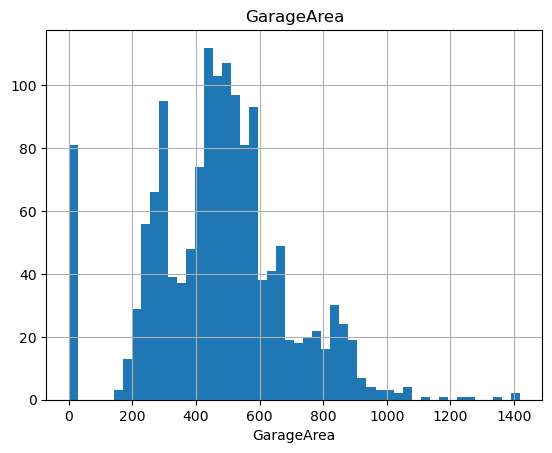

#####################################
count   1460.000
mean      94.245
std      125.339
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      262.000
95%      335.000
99%      505.460
max      857.000
Name: WoodDeckSF, dtype: float64


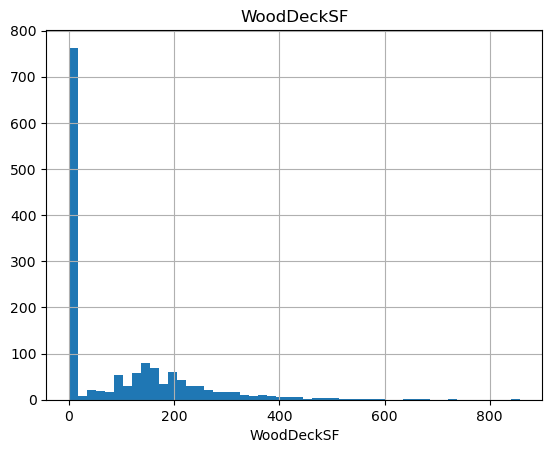

#####################################
count   1460.000
mean      46.660
std       66.256
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       25.000
60%       40.000
70%       57.000
80%       83.200
90%      130.000
95%      175.050
99%      285.820
max      547.000
Name: OpenPorchSF, dtype: float64


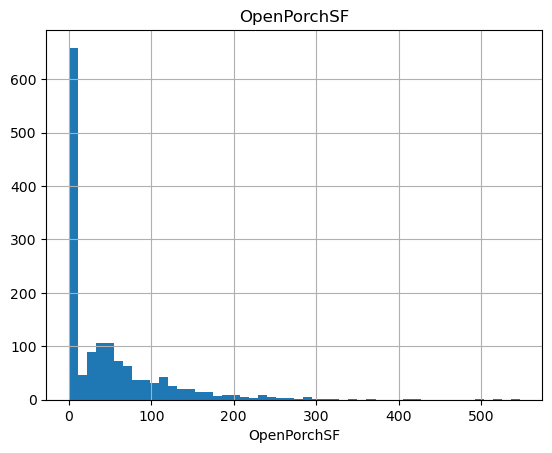

#####################################
count   1460.000
mean      21.954
std       61.119
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      180.150
99%      261.050
max      552.000
Name: EnclosedPorch, dtype: float64


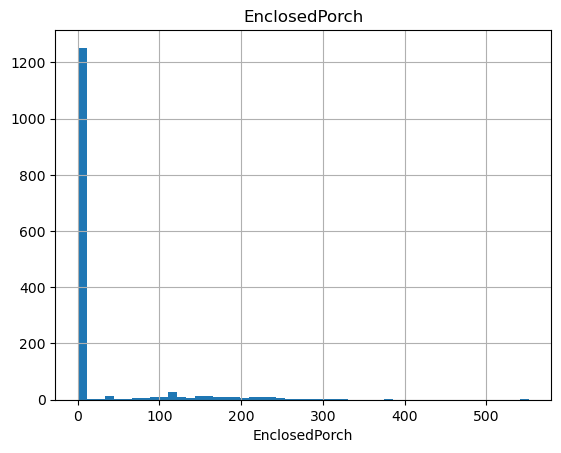

#####################################
count   1460.000
mean       3.410
std       29.317
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      168.000
max      508.000
Name: 3SsnPorch, dtype: float64


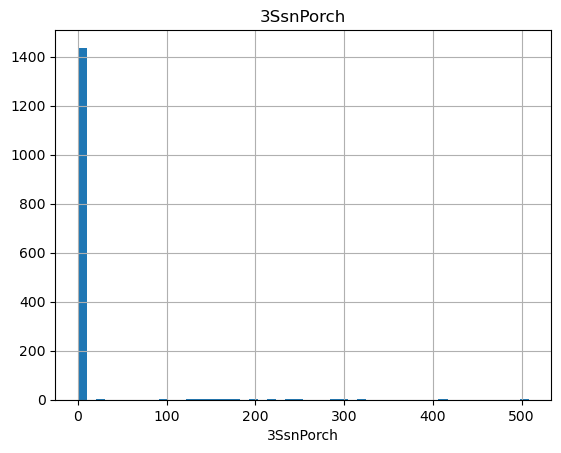

#####################################
count   1460.000
mean      15.061
std       55.757
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      160.000
99%      268.050
max      480.000
Name: ScreenPorch, dtype: float64


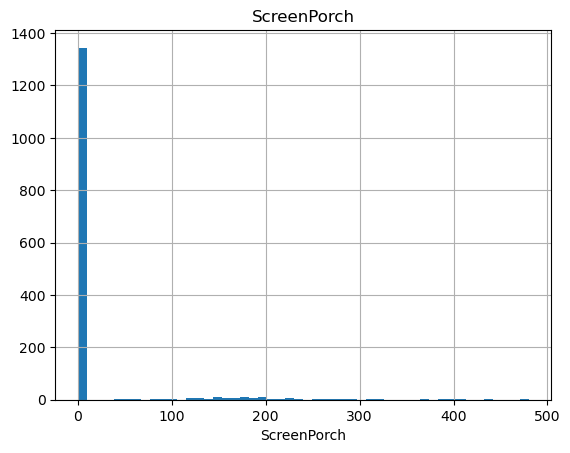

#####################################
count    1460.000
mean       43.489
std       496.123
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       700.000
max     15500.000
Name: MiscVal, dtype: float64


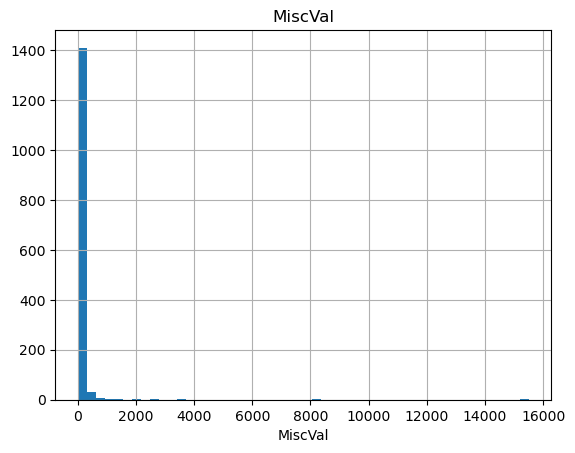

#####################################
count   1460.000
mean       6.322
std        2.704
min        1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
max       12.000
Name: MoSold, dtype: float64


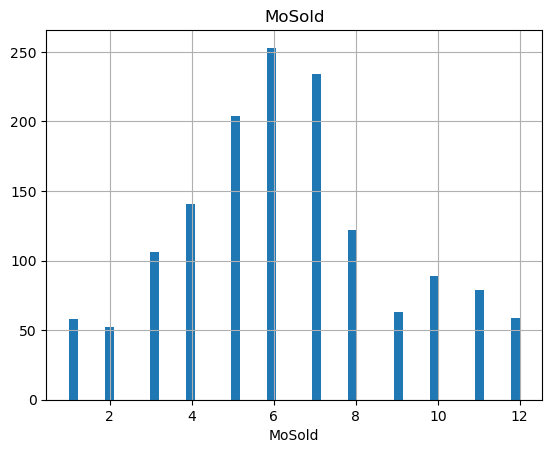

#####################################
count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
20%     124000.000
30%     135500.000
40%     147000.000
50%     163000.000
60%     179280.000
70%     198620.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64


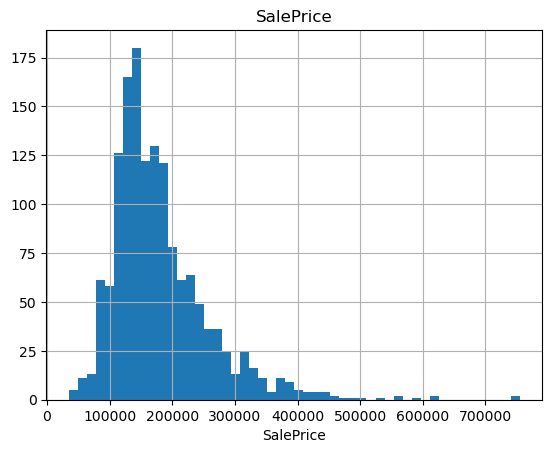

#####################################


In [48]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)

In [50]:
#Analysis of Target Variable

In [52]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df,"SalePrice",col)

          TARGET_MEAN
MSZoning             
C (all)     74528.000
FV         214014.062
RH         131558.375
RL         191004.995
RM         126316.830


        TARGET_MEAN
Street             
Grvl     130190.500
Pave     181130.539


       TARGET_MEAN
Alley             
Grvl    122219.080
Pave    168000.585


          TARGET_MEAN
LotShape             
IR1        206101.665
IR2        239833.366
IR3        216036.500
Reg        164754.818


             TARGET_MEAN
LandContour             
Bnk           143104.079
HLS           231533.940
Low           203661.111
Lvl           180183.747


           TARGET_MEAN
Utilities             
AllPub      180950.957
NoSeWa      137500.000


           TARGET_MEAN
LotConfig             
Corner      181623.426
CulDSac     223854.617
FR2         177934.574
FR3         208475.000
Inside      176938.048


           TARGET_MEAN
LandSlope             
Gtl         179956.800
Mod         196734.138
Sev         204379.231


            TARGET_MEAN


In [54]:
# TRANSFORMATION

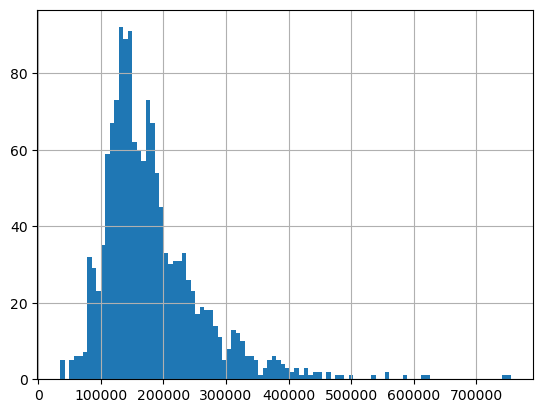

In [58]:
df["SalePrice"].hist(bins=100)
plt.show()

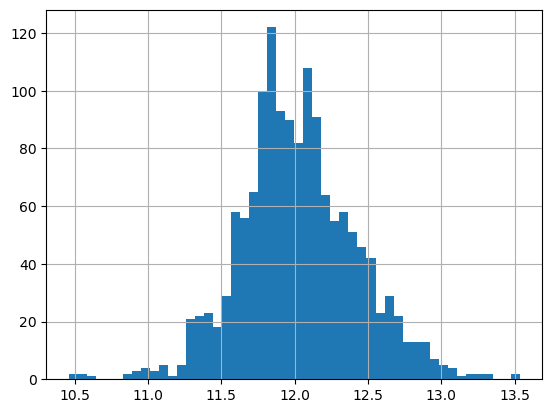

In [60]:
np.log1p(df['SalePrice']).hist(bins=50)
plt.show()

In [62]:
corr = df[num_cols].corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice
Id,1.000,0.011,-0.011,-0.033,-0.028,-0.013,-0.022,-0.050,-0.005,-0.006,-0.008,-0.015,0.010,0.006,-0.044,0.008,0.027,0.000,0.018,-0.030,-0.000,0.003,-0.047,0.001,-0.006,0.021,-0.022
MSSubClass,0.011,1.000,-0.386,-0.140,0.033,0.028,0.041,0.023,-0.070,-0.066,-0.141,-0.239,-0.252,0.308,0.046,0.075,0.040,0.085,-0.099,-0.013,-0.006,-0.012,-0.044,-0.026,-0.008,-0.014,-0.084
LotFrontage,-0.011,-0.386,1.000,0.426,0.252,0.123,0.089,0.193,0.234,0.050,0.133,0.392,0.457,0.080,0.038,0.403,0.352,0.070,0.345,0.089,0.152,0.011,0.070,0.041,0.003,0.011,0.352
LotArea,-0.033,-0.140,0.426,1.000,0.106,0.014,0.014,0.104,0.214,0.111,-0.003,0.261,0.299,0.051,0.005,0.263,0.190,-0.025,0.180,0.172,0.085,-0.018,0.020,0.043,0.038,0.001,0.264
OverallQual,-0.028,0.033,0.252,0.106,1.000,0.572,0.551,0.412,0.240,-0.059,0.308,0.538,0.476,0.295,-0.030,0.593,0.427,0.548,0.562,0.239,0.309,-0.114,0.030,0.065,-0.031,0.071,0.791
YearBuilt,-0.013,0.028,0.123,0.014,0.572,1.000,0.593,0.316,0.250,-0.049,0.149,0.391,0.282,0.010,-0.184,0.199,0.096,0.826,0.479,0.225,0.189,-0.387,0.031,-0.050,-0.034,0.012,0.523
YearRemodAdd,-0.022,0.041,0.089,0.014,0.551,0.593,1.000,0.180,0.128,-0.068,0.181,0.291,0.240,0.140,-0.062,0.287,0.192,0.642,0.372,0.206,0.226,-0.194,0.045,-0.039,-0.010,0.021,0.507
MasVnrArea,-0.050,0.023,0.193,0.104,0.412,0.316,0.180,1.000,0.265,-0.072,0.114,0.364,0.345,0.175,-0.069,0.391,0.281,0.253,0.373,0.160,0.126,-0.110,0.019,0.061,-0.030,-0.006,0.477
BsmtFinSF1,-0.005,-0.070,0.234,0.214,0.240,0.250,0.128,0.265,1.000,-0.050,-0.495,0.522,0.446,-0.137,-0.065,0.208,0.044,0.153,0.297,0.204,0.112,-0.102,0.026,0.062,0.004,-0.016,0.386
BsmtFinSF2,-0.006,-0.066,0.050,0.111,-0.059,-0.049,-0.068,-0.072,-0.050,1.000,-0.209,0.105,0.097,-0.099,0.015,-0.010,-0.035,-0.088,-0.018,0.068,0.003,0.037,-0.030,0.089,0.005,-0.015,-0.011


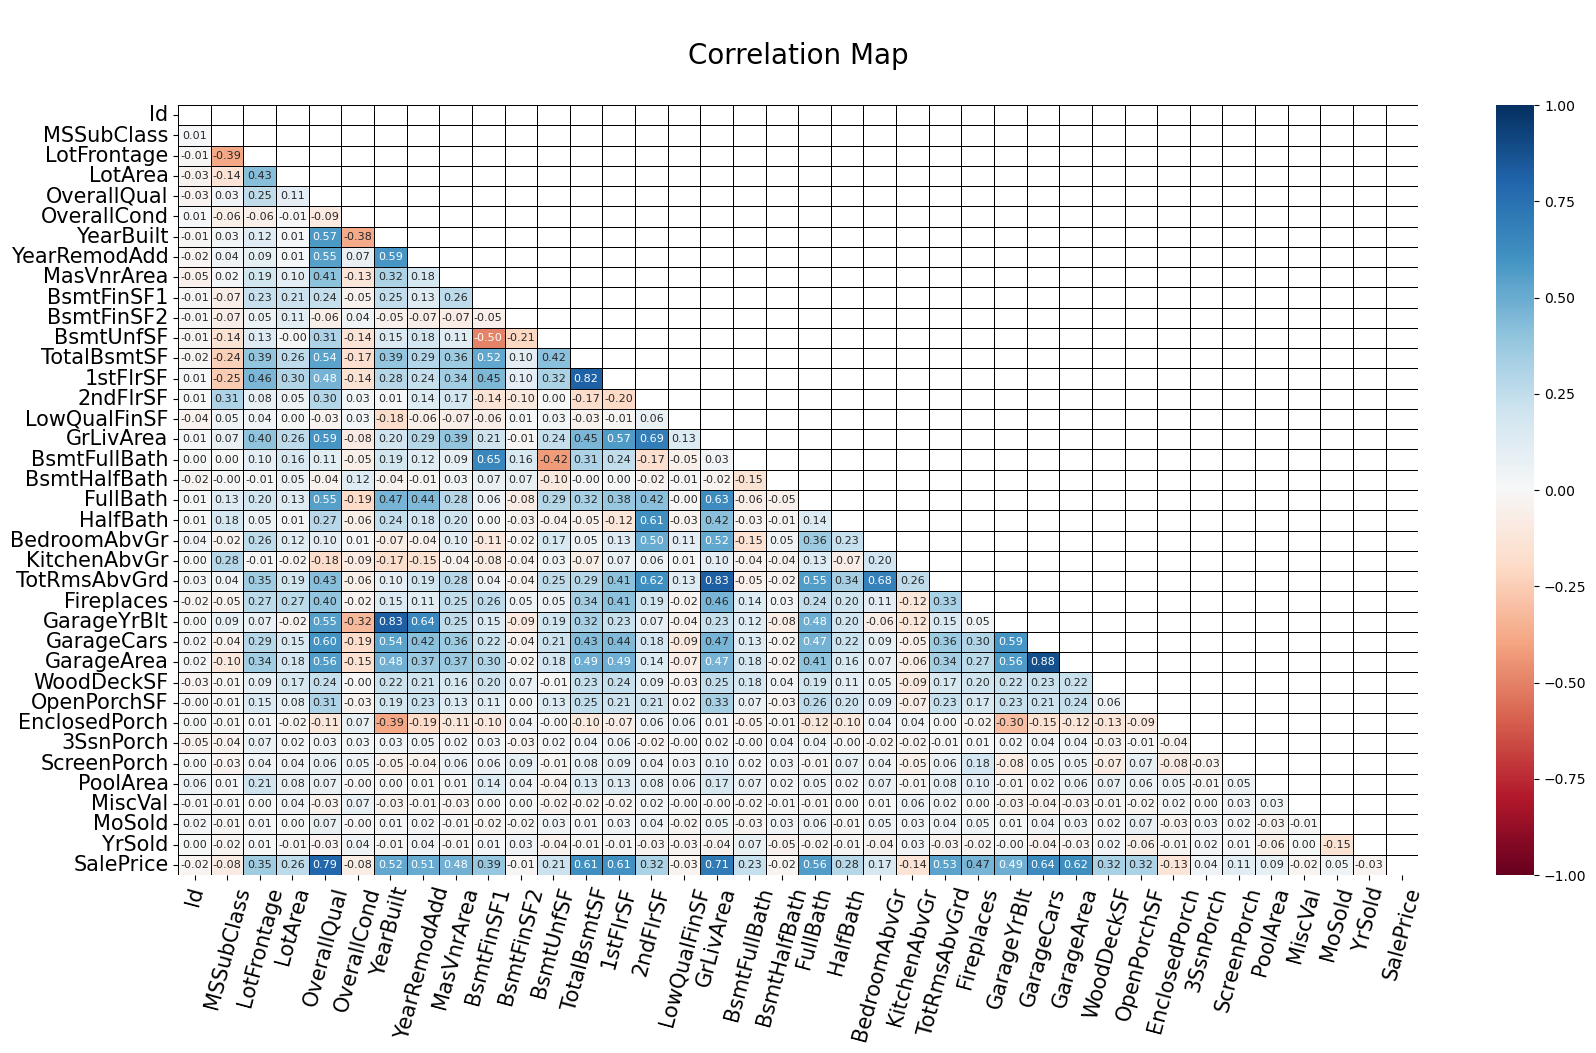

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def corr_map(df, width=14, height=6, annot_kws=15):
    """
    Plots a correlation heatmap for numerical variables in a DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        width (int): Width of the figure.
        height (int): Height of the figure.
        annot_kws (int): Font size for annotations.
    
    Returns:
        None
    """
    
    df_numeric = df.select_dtypes(include=[np.number])

    
    corr_matrix = df_numeric.corr()

    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


    f, ax = plt.subplots(figsize=(width, height))
    sns.heatmap(corr_matrix,
                annot=True,
                fmt=".2f",
                ax=ax,
                vmin=-1,
                vmax=1,
                cmap="RdBu",
                mask=mask,
                linewidths=0.4,
                linecolor="black",
                annot_kws={"size": annot_kws})
    
    plt.yticks(rotation=0, size=15)
    plt.xticks(rotation=75, size=15)
    plt.title('\nCorrelation Map\n', size=20)
    plt.show()


corr_map(df, width=20, height=10, annot_kws=8)


In [70]:
 #Feature Engineering

In [72]:
#Outlier Analysis

In [74]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [76]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col));

Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True
MoSold False


In [78]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df,col)

for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col))

Id False
MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
MiscVal False
MoSold False


In [80]:
#Missing Value Analysis

In [82]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

              n_miss  ratio
PoolQC          1453 99.520
MiscFeature     1406 96.300
Alley           1369 93.770
Fence           1179 80.750
MasVnrType       872 59.730
FireplaceQu      690 47.260
LotFrontage      259 17.740
GarageType        81  5.550
GarageYrBlt       81  5.550
GarageFinish      81  5.550
GarageQual        81  5.550
GarageCond        81  5.550
BsmtFinType2      38  2.600
BsmtExposure      38  2.600
BsmtFinType1      37  2.530
BsmtCond          37  2.530
BsmtQual          37  2.530
MasVnrArea         8  0.550
Electrical         1  0.070


In [84]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [86]:
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [88]:
for col in no_cols:
    df[col].fillna("No", inplace=True)

missing_values_table(df)

             n_miss  ratio
MasVnrType      872 59.730
LotFrontage     259 17.740
GarageYrBlt      81  5.550
MasVnrArea        8  0.550
Electrical        1  0.070


In [92]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0] 

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  

    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data

In [94]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
LotFrontage    259
MasVnrType     872
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

LotFrontage    0
MasVnrType     0
MasVnrArea     0
Electrical     0
GarageYrBlt    0
dtype: int64 




In [96]:
#Rare Analysis and Apply Rare Encoder

In [98]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          COUNT  RATIO  TARGET_MEAN
MSZoning                           
C (all)      10  0.007    74528.000
FV           65  0.045   214014.062
RH           16  0.011   131558.375
RL         1151  0.788   191004.995
RM          218  0.149   126316.830


Street : 2
        COUNT  RATIO  TARGET_MEAN
Street                           
Grvl        6  0.004   130190.500
Pave     1454  0.996   181130.539


Alley : 3
       COUNT  RATIO  TARGET_MEAN
Alley                           
Grvl      50  0.034   122219.080
No      1369  0.938   183452.131
Pave      41  0.028   168000.585


LotShape : 4
          COUNT  RATIO  TARGET_MEAN
LotShape                           
IR1         484  0.332   206101.665
IR2          41  0.028   239833.366
IR3          10  0.007   216036.500
Reg         925  0.634   164754.818


LandContour : 4
             COUNT  RATIO  TARGET_MEAN
LandContour                           
Bnk             63  0.043   143104.079
HLS             50  0.034   231533.940
Low 

In [100]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [102]:
df = rare_encoder(df, 0.01)
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
          COUNT  RATIO  TARGET_MEAN
MSZoning                           
FV           65  0.045   214014.062
RH           16  0.011   131558.375
RL         1151  0.788   191004.995
RM          218  0.149   126316.830
Rare         10  0.007    74528.000


Street : 2
        COUNT  RATIO  TARGET_MEAN
Street                           
Pave     1454  0.996   181130.539
Rare        6  0.004   130190.500


Alley : 3
       COUNT  RATIO  TARGET_MEAN
Alley                           
Grvl      50  0.034   122219.080
No      1369  0.938   183452.131
Pave      41  0.028   168000.585


LotShape : 4
          COUNT  RATIO  TARGET_MEAN
LotShape                           
IR1         484  0.332   206101.665
IR2          41  0.028   239833.366
Rare         10  0.007   216036.500
Reg         925  0.634   164754.818


LandContour : 4
             COUNT  RATIO  TARGET_MEAN
LandContour                           
Bnk             63  0.043   143104.079
HLS             50  0.034   231533.940
Low 

In [112]:
#Creating New Variables

In [114]:
cols_to_convert = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                   "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual",
                   "GarageCond", "Fence"]

# Sütunları sayısal verilere dönüştür (hata verenleri NaN yapar)
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")


In [116]:
df[cols_to_convert] = df[cols_to_convert].fillna(0)

In [118]:
df["NEW_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]

df["NEW_Garage*GrLiv"] = (df["GarageArea"] * df["GrLivArea"])

df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1)


# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF


# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF)


df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"]


df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd)

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt


drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood"]

# drop_list'teki değişkenlerin düşürülmesi
df.drop(drop_list, axis=1, inplace=True)

In [120]:
# Label Encoding & One-Hot Encoding

In [122]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df, col)


def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

Observations: 1460
Variables: 92
cat_cols: 49
num_cols: 43
cat_but_car: 0
num_but_cat: 27


In [124]:
df.shape

(1460, 172)

In [126]:
#Modeling

In [134]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

In [136]:
y = train_df['SalePrice']  # np.log1p(df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [140]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 33676.5529 (LR) 
RMSE: 33356.6968 (Ridge) 
RMSE: 33625.2438 (Lasso) 
RMSE: 34185.3499 (ElasticNet) 
RMSE: 47463.3385 (KNN) 
RMSE: 38901.0334 (CART) 
RMSE: 29370.4615 (RF) 
RMSE: 81072.7794 (SVR) 
RMSE: 25431.0696 (GBM) 
RMSE: 28243.2705 (XGBoost) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6396
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 137
[LightGBM] [Info] Start training from score 180717.091610
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6397
[LightGBM] [Info] Number of data points in 

In [142]:
#MAE

In [144]:
from sklearn.metrics import mean_absolute_error
for name, regressor in models:
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    print(f"MAE: {mae} ({name}) ")

MAE: 18483.228491751586 (LR) 
MAE: 18213.182213655255 (Ridge) 
MAE: 18380.793535310735 (Lasso) 
MAE: 18568.63388564263 (ElasticNet) 
MAE: 29685.054794520547 (KNN) 
MAE: 23848.98287671233 (CART) 
MAE: 17526.04845890411 (RF) 
MAE: 55804.71718975874 (SVR) 
MAE: 16177.697231262058 (GBM) 
MAE: 17468.130538313355 (XGBoost) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6397
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 132
[LightGBM] [Info] Start training from score 181437.721747
MAE: 15886.792538387024 (LightGBM) 
MAE: 14875.945170211804 (CatBoost) 


In [146]:
#MINUMUM MAE

In [148]:
from sklearn.metrics import mean_absolute_error
min_mae = np.inf
for name, regressor in models:
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    if mae < min_mae:
        min_mae = mae
        final_model_name = name
        final_model = model
    print(f"MAE: {mae} ({name}) ")
print(f"Minumum MAE: {min_mae} with {final_model}")
final_model

MAE: 18483.228491751586 (LR) 
MAE: 18213.182213655255 (Ridge) 
MAE: 18380.793535310735 (Lasso) 
MAE: 18568.63388564263 (ElasticNet) 
MAE: 29685.054794520547 (KNN) 
MAE: 23154.948630136987 (CART) 
MAE: 17947.17325342466 (RF) 
MAE: 55804.71718975874 (SVR) 
MAE: 16123.362843831828 (GBM) 
MAE: 17468.130538313355 (XGBoost) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6397
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 132
[LightGBM] [Info] Start training from score 181437.721747
MAE: 15886.792538387024 (LightGBM) 
MAE: 14875.945170211804 (CatBoost) 
Minumum MAE: 14875.945170211804 with <catboost.core.CatBoostRegressor object at 0x00000222D1129610>


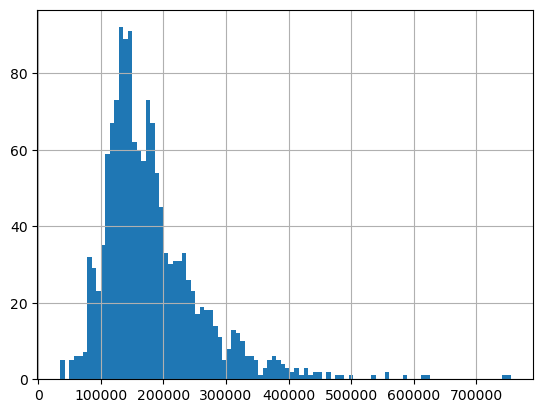

In [150]:
df['SalePrice'].mean()
df['SalePrice'].std()
df["SalePrice"].hist(bins=100)
plt.show(block=True)

In [152]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

# plt.hist(np.log1p(train_df['SalePrice']), bins=100)
y = np.log1p(train_df['SalePrice'])
X = train_df.drop(["Id", "SalePrice"], axis=1)

# Verinin eğitim ve tet verisi olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)


lgbm = LGBMRegressor().fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

y_pred
# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y = np.expm1(y_pred)
new_y
new_y_test = np.expm1(y_test)
new_y_test

np.sqrt(mean_squared_error(new_y_test, new_y))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6397
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 132
[LightGBM] [Info] Start training from score 12.027102


22821.96442291437

In [154]:
#Hyperparameter optimization

In [158]:
lgbm_model = LGBMRegressor(random_state=46)

rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))


lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500],
               "colsample_bytree": [0.5, 0.7, 1]
             }

lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6396
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 137
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6397
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 133
[LightGBM] [Info] Start training from score 12.023288
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 

In [160]:
lgbm_gs_best.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 1500}

In [162]:
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6722
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 141
[LightGBM] [Info] Start training from score 12.024057


In [164]:
print(f"İlk RMSE: {rmse}")
rmse_new = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))
print(f"Yeni RMSE: {rmse_new}")

İlk RMSE: 0.1353361378312088
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6396
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 137
[LightGBM] [Info] Start training from score 12.021409
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6397
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 133
[LightGBM] [Info] Start training from score 12.023288
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise mult

In [166]:
#Feature Importance

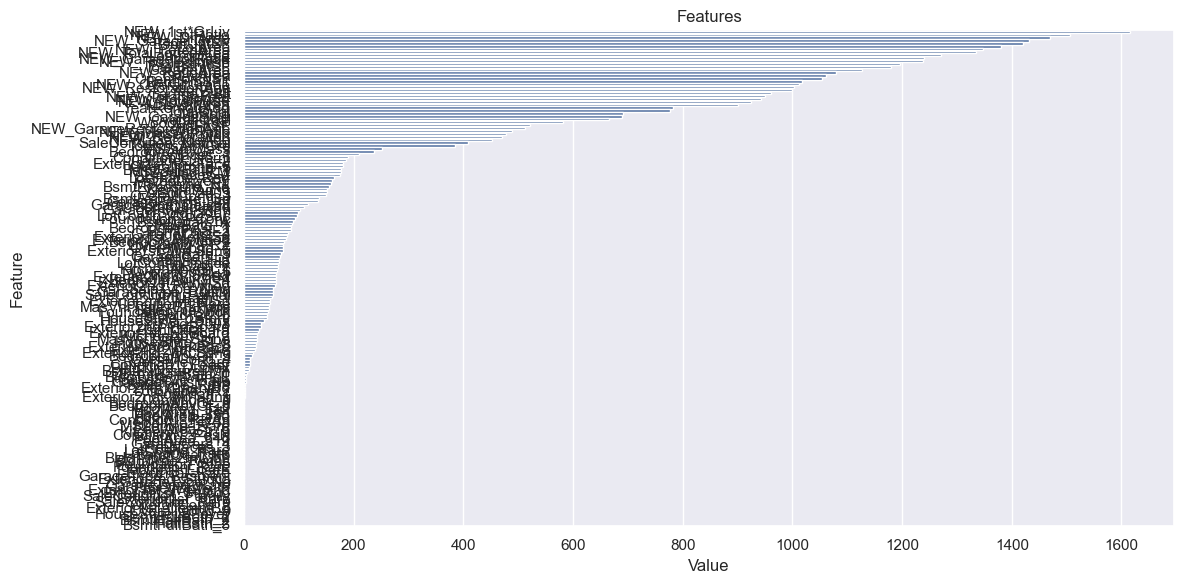

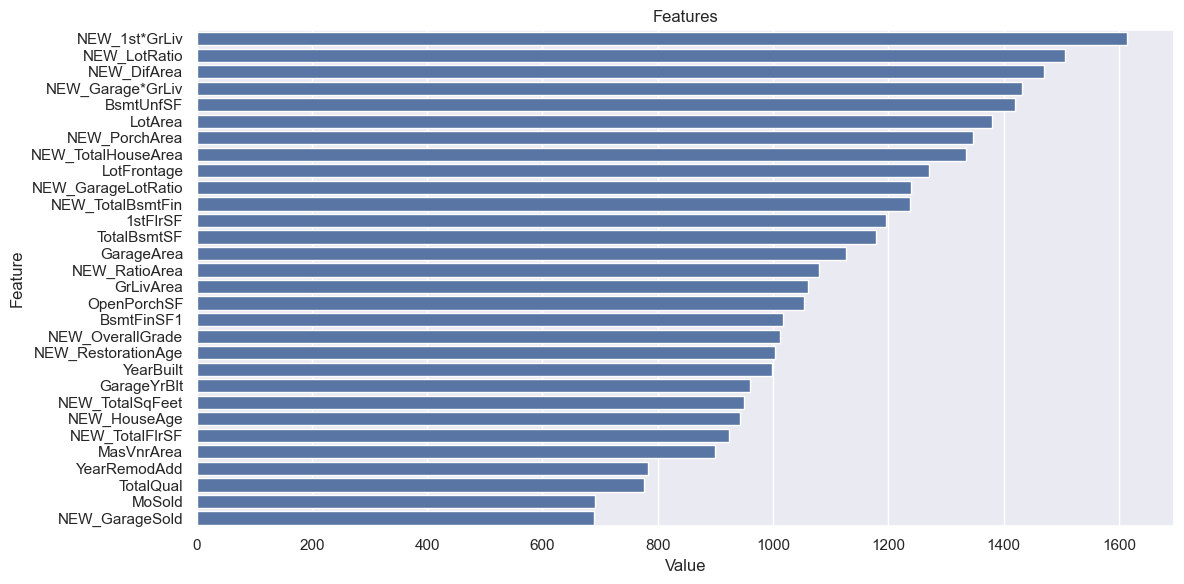

In [170]:
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")


plot_importance(final_model, X)
plot_importance(final_model, X, num=30)